In [8]:
# STEP 0 - Import datasets

%run dog-breed-cnn.py

# Load train, test and validation datasets
train_files, train_targets = load_dataset('Data/dogImages/train')
valid_files, valid_targets = load_dataset('Data/dogImages/valid')
test_files, test_targets = load_dataset('Data/dogImages/test')

# Load list of dogs names
dog_names = [item[20:-1] for item in sorted(glob('Data/dogImages/train/*/'))]

# Print statistics about the dataset
print(f'There are {len(dog_names)} dog categories.')
print(f'There are {len(np.hstack([train_files, valid_files, test_files]))} total dog images.')
print(f'There are {len(train_files)} training dog images.')
print(f'There are {len(valid_files)} validation dog images.')
print(f'There are {len(test_files)} test dog images.')

# Import human datasets
random.seed(8675309)

# Load filenames in shuffled human dataset
human_files = np.array(glob('Data/lfw/*/*'))
random.shuffle(human_files)

# Print statistics about the human dataset
print(f'There are {len(human_files)} total human images.')

There are 133 dog categories.
There are 8351 total dog images.
There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.
There are 13233 total human images.


Number of faces detected: 1


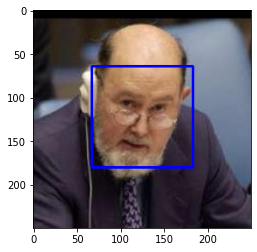

In [12]:
%run dog-breed-cnn.py
%matplotlib inline

# STEP 1 - Detect humans
# Extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# Load color (BGR) image
img = cv2.imread(human_files[3])
# Convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find faces in the image
faces = face_cascade.detectMultiScale(gray)

# Print number of faces detected in the image
print(f'Number of faces detected: {len(faces)}')

# Get bounding box for each detected face
for (x,y,w,h) in faces:
    # Add bounding box to color image
    cv2.rectangle(img,(x,y), (x+w,y+h), (255,0,0), 2)

# Convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image, along with the bounding box
plt.imshow(cv_rgb)
plt.show()

In [43]:
%run dog-breed-cnn.py

# ASSESSING THE HUMAN FACE DETECTOR
human_files_short = human_files[:100]
dog_files_short = train_files[:100]

# TODO: Test the performance of the face_detector algorithm on the images in human_files_short and dog_files_short.
accuracy_dog = 100-np.array(list(map(face_detector, dog_files_short))).sum()
accuracy_human = np.array(list(map(face_detector, human_files_short))).sum()

print(f'Accuracy on Dogs files: {accuracy_dog}% - Accuracy on Human files: {accuracy_human}%.')

KeyboardInterrupt: 

In [19]:
%run dog-breed-cnn.py

# Define RESNET50 Model
ResNet50_mod = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 69s 1us/step


In [47]:
%run dog-breed-cnn.py

# Testing performance of dog_detector function on human_files_short and dog_files_short
accuracy_dog = (np.array(list(map(dog_detector, dog_files_short)))).mean()
accuracy_human = (1-(np.array(list(map(dog_detector, human_files_short))))).mean()

print(f"Accuracy on dog files: {accuracy_dog*100}%\nAccuracy on Human files: {accuracy_human*100}")

Accuracy on dog files: 100.0%
Accuracy on Human files: 100.0
